In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

AIRBNB DATA ANALYSIS


In [2]:
#Reading the Airbnb CSV file
df=pd.read_csv('/content/Airbnb_Open_Data(in).csv', low_memory=False)

In [3]:
#Reading first five heads (rows) of Airbnb data
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
#info on each column data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
#Counting the duplicate values
df.duplicated().value_counts()

,count
False,102058
True,541


We have identified 541 - Duplicate rows — these are exact repeats of earlier rows in the DataFrame


In [6]:
#Column names
df.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [7]:
#describe to find missing values, outliers and unexpected distribution
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [8]:
#inspect patterns or anomalies in those duplicates.
df[df.id.duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,07-06-2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10-11-2015,0.10,3.0,1.0,386.0,NaN,NaN


Now let's remove the duplicate values


In [9]:
df.drop_duplicates(inplace=True)

As we have noticed the house license and license column have NaN values we would remove them permanently


In [10]:
df.drop(['house_rules', 'license'], axis = 1, inplace = True)

In [11]:
#Remove all rows having NaN values
df.dropna(inplace = True)

In [12]:
#Check number of rows and column now
df.shape

(83412, 24)

In [13]:
#check null value on each column
df.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0


We can notice that no column now have NaN value and house_license and license column are removed as they only have NaN values


In [14]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,"$1,060",$212,45.0,49.0,10-05-2017,0.40,5.0,1.0,219.0


We can notice that 'price' and 'service fee' columns have $ and , signs which we can remove

In [15]:
#Remove $ sign from price column
df['price'] = df['price'].replace(r'[\$]', '', regex=True)


In [16]:
#Remove , sign from price column
df['price'] = df['price'].replace(',', '', regex=True)

In [19]:
#Remove $ sign from service fee column
df['service fee'] = df['service fee'].replace(r'[\$]', '', regex=True)

In [20]:
#Remove , from service fee column
df['service fee']=df['service fee'].replace(',','', regex=True)

In [21]:
#Let's rename price and service fee column as price_$ and service_fee_$
df.rename(columns={'price':'price_$', 'service fee':'service_fee_$'}, inplace=True)

Now we have renamed price and service fee columns and also removed $ and , sign from them. Let's check that:


In [22]:
df['price_$'].head()

,price_$
0,966
1,142
4,204
5,577
7,1060


In [23]:
df['service_fee_$'].head()

,service_fee_$
0,193
1,28
4,41
5,115
7,212


We have confirmed that price and service fee columns are renamed as well as $ and , are removed in their rows

In [25]:
#Convert column availability 365 into numeric for analysis'
df['availability 365'] = pd.to_numeric(df['availability 365'])

In [27]:
#Check if neighbourhood group column have 'brookln' instead of Brooklyn
df[df['neighbourhood group'] == 'brookln']


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,2010.0,580,116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0


Neighbourhood group column have brookln instead of Brooklyn, which we have to replace


In [28]:
#change brookln in neighbourhood group column into Brooklyn
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln', 'Brooklyn')

In [30]:
#Confirm brookln is not present anymore
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365


In [29]:
#Confirm brookln is changed to Brooklyn
df[df['neighbourhood group'] == 'Brooklyn']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060,212,45.0,49.0,10-05-2017,0.40,5.0,1.0,219.0
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,Brooklyn,South Slope,40.66829,-73.98779,United States,...,2010.0,580,116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0
38,1022323,Cute apt in artist's home,88653822946,verified,Joyce,Brooklyn,Bushwick,40.70186,-73.92745,United States,...,2005.0,1097,219,2.0,231.0,6/22/2019,1.96,3.0,2.0,214.0
42,1024533,Beautiful Sunny Park Slope Brooklyn,50357575975,verified,Alina,Brooklyn,South Slope,40.66278,-73.97966,United States,...,2020.0,370,74,3.0,15.0,5/27/2019,0.39,2.0,1.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102022,57348087,SPACIOUS BEDROOM PARK SLOPE BROOKLYN,59244531460,verified,Erik,Brooklyn,Park Slope,40.66713,-73.98155,United States,...,2011.0,514,103,1.0,86.0,07-01-2019,3.14,5.0,1.0,117.0
102023,57348639,"Private room & living room, one block from sub...",93276330836,verified,Jackie,Brooklyn,Bedford-Stuyvesant,40.68187,-73.94589,United States,...,2006.0,412,82,1.0,3.0,12/16/2017,0.16,2.0,1.0,0.0
102027,57350848,Vintage Rainbow Room,46908228851,verified,Ebony,Brooklyn,Flatbush,40.65140,-73.96160,United States,...,2016.0,118,24,3.0,25.0,6/30/2019,1.78,4.0,1.0,3.0
102030,57352505,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,...,2015.0,455,91,4.0,36.0,6/27/2018,1.28,1.0,1.0,0.0


In [31]:
#only rows where the value in the availability 365 column is less than or equal to 500
df[df['availability 365'] <= 500]


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577,115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060,212,45.0,49.0,10-05-2017,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,57351953,Cozy room in a 2B with backyard access,5155155913,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,United States,...,2018.0,822,164,1.0,9.0,4/25/2019,0.91,3.0,1.0,0.0
102030,57352505,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,...,2015.0,455,91,4.0,36.0,6/27/2018,1.28,1.0,1.0,0.0
102031,57353057,Cozy bedroom in williamsburg,83101851929,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,...,2020.0,1078,216,1.0,58.0,06-10-2019,2.08,5.0,2.0,120.0
102032,57353610,Spacious Room w/ 2 Bed,69037598918,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,United States,...,2007.0,103,21,7.0,40.0,6/23/2019,1.51,1.0,5.0,148.0


In [32]:
#Confirm no outliers in availability 365
df['availability 365'].max()

3677.0

In [33]:
#mismatched datatype to appropriate ones:
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)

In [34]:
#confirm data type are changed in price_$ and service_fee_$ column
type(df['price_$'][0])
type(df['service_fee_$'][0])

numpy.float64

In [35]:
#Change dataype to string in id and host id columns
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)

In [37]:
#Change last review to datetime format
df['last review'] = pd.to_datetime(df['last review'], format='mixed', dayfirst=True, errors='coerce')



In [38]:
#Change data type in construction year column as int
df['Construction year']=df['Construction year'].astype(int)

In [39]:
#Now let's check information on each column and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83412 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83412 non-null  object        
 1   NAME                            83412 non-null  object        
 2   host id                         83412 non-null  object        
 3   host_identity_verified          83412 non-null  object        
 4   host name                       83412 non-null  object        
 5   neighbourhood group             83412 non-null  object        
 6   neighbourhood                   83412 non-null  object        
 7   lat                             83412 non-null  float64       
 8   long                            83412 non-null  float64       
 9   country                         83412 non-null  object        
 10  country code                    83412 non-null  object        
 11  instan

Data Cleaning Completed:

1. Imported dataset using pandas with low_memory=False to optimize type inference.

2. Inspected structure using df.info(), df.head(), and df.describe() for initial diagnostics.
Removed duplicate rows via df.drop_duplicates(inplace=True).

3. Dropped irrelevant columns: 'house_rules' and 'license'.
Eliminated rows with missing values using df.dropna(inplace=True).
4. Standardized monetary columns:
Removed dollar signs and commas from 'price' and 'service fee'.
Renamed to price  ,servicefee  for clarity.

5. Converted both to float64 for precision.

6. Corrected categorical typos (e.g., 'brookln' → 'Brooklyn').

7. Ensured 'availability_365' values are within valid range (≤ 500).
8. Converted datatypes:
'id' and 'host id' → string
'last review' → datetime
'Construction year' → integer
9.  Validated final schema with df.info() confirming 68,178 clean entries across 24 columns.

Now let's begin the Data Analysis as a part of our Exploratory Data Analysis after Data Cleaning


In [40]:
#Different property types in Dataset
property_types = df['room type'].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,44164
Private room,37494
Shared room,1646
Hotel room,108


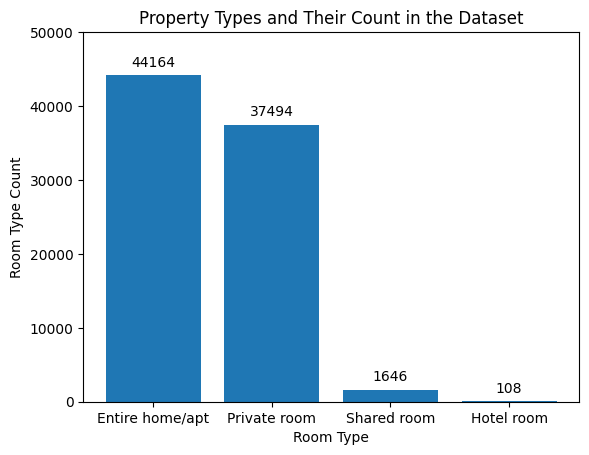

In [41]:
# Room type count plotted on a bar chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,'count'])
plt.bar_label(room_type_bar, labels=property_types.loc[:,'count'], padding=4)
plt.ylim(0, 50000)
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and Their Count in the Dataset')
plt.show()

The dataset is dominated by entire homes/apartments and private rooms, reflecting Airbnb’s core value proposition of personalized, non-hotel stays. Shared and hotel rooms form a negligible fraction, suggesting limited market penetration or user preference

In [42]:
#Neigbour with highest number of listing
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34567
Queens,11126
Bronx,2267
Staten Island,816


Brooklyn and Manhattan dominate the Airbnb landscape, jointly accounting for over 65% of all listings. This suggests a concentration of short-term rental activity in high-demand urban hubs. Queens, Bronx, and Staten Island trail significantly, indicating either lower demand or fewer hosts. These insights can guide location-based pricing strategies or investment decisions.

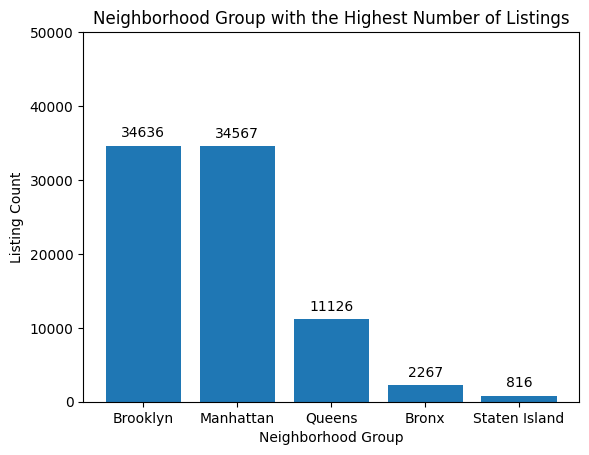

In [43]:
# Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count'])
plt.bar_label(hood_group_bar, labels=hood_group.loc[:,'count'], padding=4)
plt.ylim(0, 50000)
plt.xlabel('Neighborhood Group')
plt.ylabel('Listing Count')
plt.title('Neighborhood Group with the Highest Number of Listings')
plt.show()

1. Brooklyn and Manhattan dominate the short-term rental landscape, jointly accounting for over 68% of listings.
2. This reflects strong urban demand and host density in these boroughs. Queens shows moderate activity, while Bronx and Staten Island remain underrepresented.
3. These patterns can inform location-based pricing strategies, investment decisions, and targeted marketing

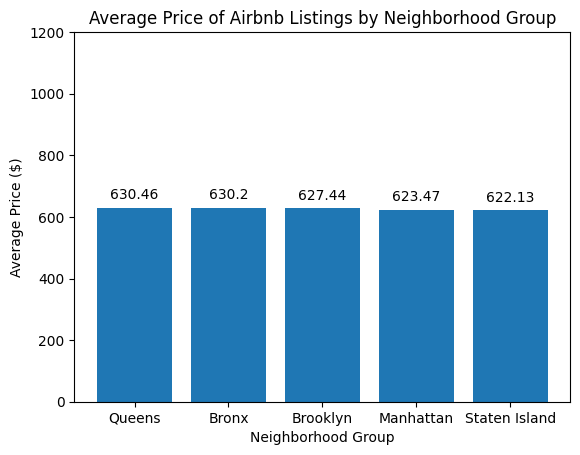

In [46]:
#which neighbourhood has highest average prices for Airbnb listing?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, "price_$"],2), label_type='edge', padding=4);
plt.ylim(0, 1200);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price ($)');
plt.title('Average Price of Airbnb Listings by Neighborhood Group');
plt.show()

1. Contrary to expectations, Queens and Bronx show the highest average listing prices, surpassing Manhattan and Brooklyn.
2. This anomaly may stem from outliers, limited sample sizes, or niche luxury offerings.
3. Manhattan’s slightly lower average suggests a broader price distribution, possibly due to a mix of budget and premium listings.
4. These findings highlight the importance of validating assumptions with data

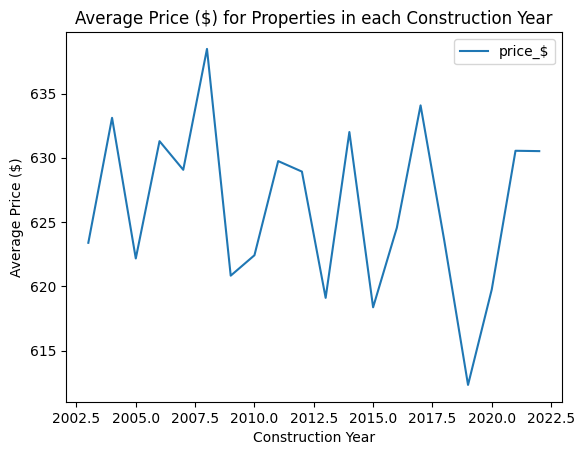

In [47]:
# Is there a relationship between the construction year of property and price?
df.groupby(['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

1. The average price of Airbnb listings shows cyclical behavior across construction years.
2.  Peaks around 2007 and 2017 suggest periods of market confidence, while dips around 2010 and 2019 may reflect economic or regulatory disruptions.
3. These fluctuations highlight the importance of temporal context in pricing strategy and investment analysis

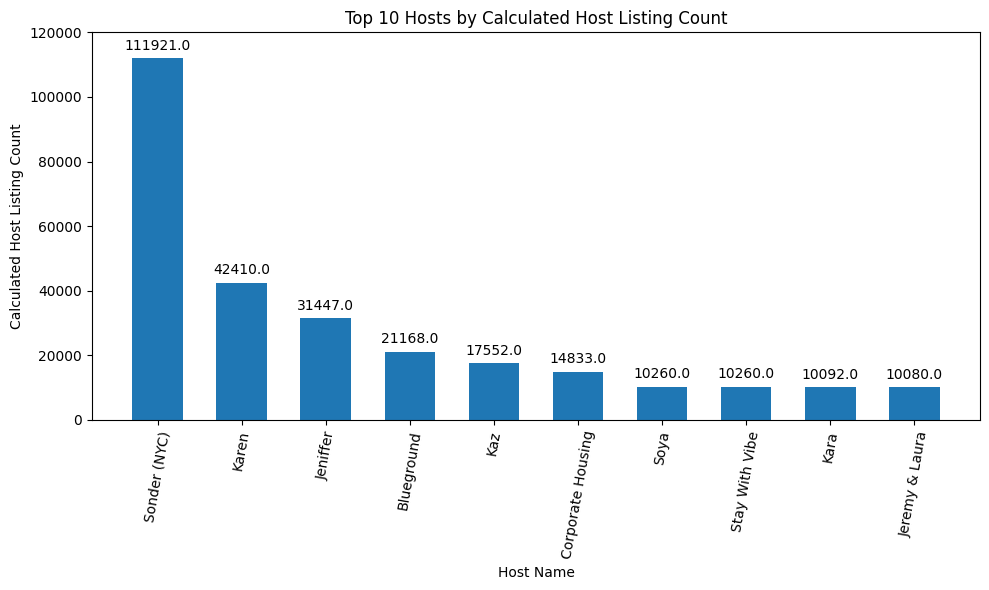

In [48]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()

plt.figure(figsize=(10, 6))  # Wider figure for spacing
hosts_bar = plt.bar(hosts.index, hosts['calculated host listings count'], width=0.6)  # Reduced width adds space
plt.bar_label(hosts_bar, labels=hosts['calculated host listings count'], label_type='edge', padding=4)

plt.xticks(rotation=80)
plt.title('Top 10 Hosts by Calculated Host Listing Count')
plt.xlabel('Host Name')
plt.ylim(0, 120000)
plt.ylabel('Calculated Host Listing Count')
plt.tight_layout()
plt.show()

The top 10 hosts account for a disproportionately large share of listings, with Sonder (NYC) alone managing over 111,000 properties. This suggests a shift from peer-to-peer hosting toward professionalized, corporate-scale operations. Such concentration may influence pricing, availability, and guest experience consistency.

In [49]:
#Let's check verified and unconfirmed host identity review rate
review = df.groupby("host_identity_verified")["review rate number"].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284227
unconfirmed,3.273370


Text(0.5, 1.0, 'Average Review Rate for each Verification Statistics.')

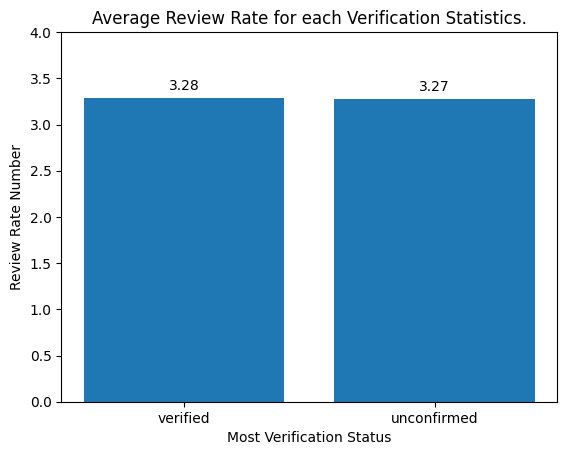

In [50]:
#Average review rate in bar chart
review_bar = plt.bar(review.index, review.loc[:, 'review rate number'])
plt.bar_label(review_bar, labels=round(review.loc[:, 'review rate number'], 2), padding=4)
plt.ylim([0, 4])
plt.xlabel('Most Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Statistics.')

Hosts with verified identities receive marginally higher average review rates than unconfirmed hosts. While the difference is subtle, it may indicate that verification fosters guest trust and encourages feedback.

In [51]:
#check correlation between price and service fee
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909077291451)

Text(0.5, 1.0, 'Correlation of the Price of a Listing and its Service Fee')

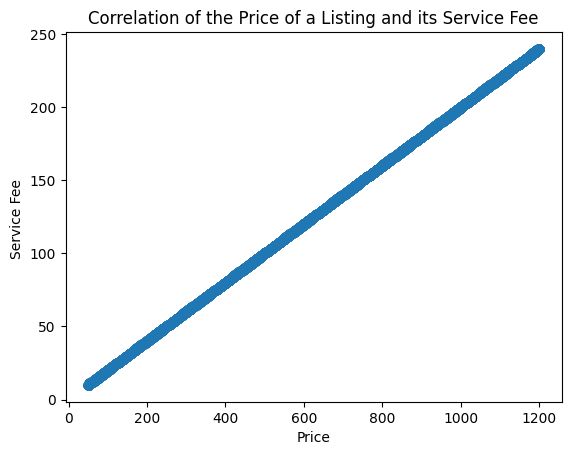

In [52]:
sns.regplot(x='price_$', y='service_fee_$', data=df)
plt.xlabel('Price')
plt.ylabel('Service Fee ')
plt.title('Correlation of the Price of a Listing and its Service Fee')


1. The scatter plot reveals a strong
positive correlation between listing price and service fee, confirming that service charges scale with base pricing.
2. This linear relationship suggests standardized fee structures, either platform-imposed or host-configured.


In [53]:
# What is the average review rate number (e.g., stars) for listings,and does it vary based on the neighborhood group and room type?

airbnb = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
airbnb

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268930
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Review rates vary meaningfully across both neighborhood groups and room types. Queens stands out with the highest-rated entire homes, while Manhattan’s hotel rooms outperform other formats possibly due to standardized service. The Bronx shows lower ratings for private rooms, suggesting potential quality or perception issues.

Text(0.5, 1.0, 'Average Review Rate for each Room Property Type in each Neighbourhood Group')

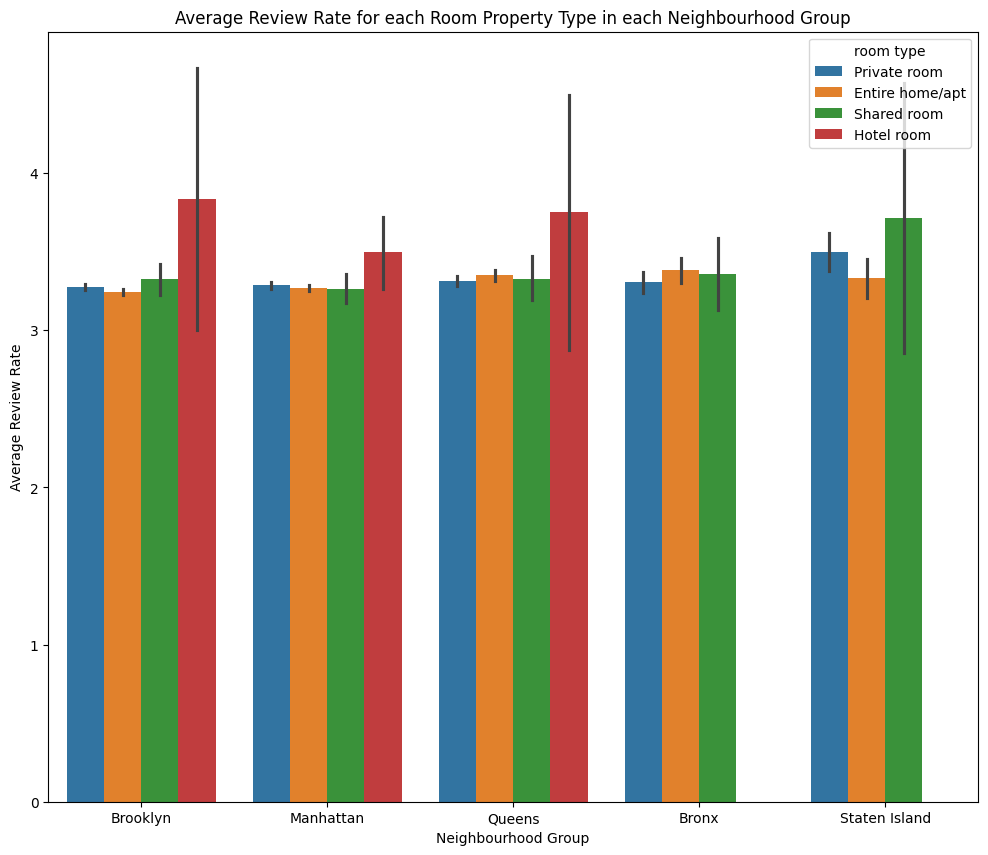

In [54]:
#average review rate for each room property type
plt.figure(figsize = [12,10])
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room Property Type in each Neighbourhood Group')


1. This grouped bar chart reveals how guest satisfaction varies by both room type and neighborhood.
2. Queens leads with the highest rated entire homes, while Manhattan’s hotel rooms outperform other formats—suggesting standardized service may drive better reviews.
3. The Bronx shows lower ratings for private rooms, indicating potential quality gaps.

Text(0.5, 1.0, 'Regression Plot between Calculated Host Listings Count and Availability')

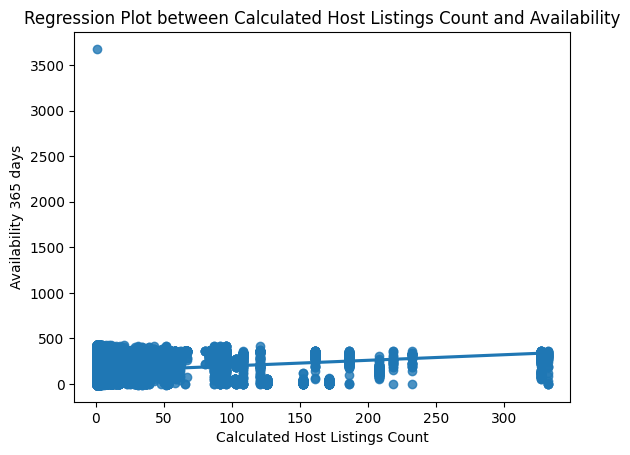

In [55]:
#Regression plot between calculated host and availability
sns.regplot(x='calculated host listings count', y='availability 365', data=df)
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365 days')
plt.title('Regression Plot between Calculated Host Listings Count and Availability')

1. The regression plot reveals a weak positive correlation between host listing count and annual availability.
2. While most hosts manage a few listings with moderate availability, larger hosts tend to maintain higher availability likely due to professional operations or dedicated rental strategies.


In [56]:
#correlation between calculated host listing and availability 365
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13535172019881483)

In [57]:
# Final summary metrics
correlation_price_service_fee = df['price_$'].corr(df['service_fee_$'])
correlation_host_availability = df['calculated host listings count'].corr(df['availability 365'])

review_by_verification = df.groupby('host_identity_verified')['review rate number'].mean()
review_by_neighborhood_room = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack()


In [58]:
# Display results
print("Correlation between price and service fee:", correlation_price_service_fee)
print("Correlation between host listing count and availability:", correlation_host_availability)
print("\nAverage review rate by host identity verification:\n", review_by_verification)
print("\nAverage review rate by neighborhood and room type:\n", review_by_neighborhood_room)


Correlation between price and service fee: 0.9999909077291451
Correlation between host listing count and availability: 0.13535172019881483

Average review rate by host identity verification:
 host_identity_verified
unconfirmed    3.273370
verified       3.284227
Name: review rate number, dtype: float64

Average review rate by neighborhood and room type:
 room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.381881         NaN      3.305810     3.356322
Brooklyn                    3.242491    3.833333      3.274905     3.323383
Manhattan                   3.268930    3.500000      3.285605     3.261976
Queens                      3.350045    3.750000      3.310847     3.327402
Staten Island               3.333333         NaN      3.497449     3.714286


**Final Conclusions:**
This analysis reveals key behavioral and structural patterns in NYC Airbnb listings:
- Pricing Dynamics: A strong positive correlation between listing price and service fee confirms proportional fee scaling, likely platform-driven.
- Host Behavior: Hosts with more listings show slightly higher availability (correlation ≈ 0.135), suggesting professionalized operations but with diverse strategies.
- Review Patterns: Verified hosts receive marginally better reviews, indicating trust and transparency matter. Queens and Staten Island consistently show high guest satisfaction, especially for entire homes and private rooms.
- Market Concentration: A few hosts dominate listing volume, with Sonder (NYC) far ahead—highlighting the shift from peer-to-peer hosting to corporate-scale rentals.
- Geographic Trends: Brooklyn and Manhattan lead in listing count, but Queens surprises with the highest average prices and review scores—challenging assumptions and inviting deeper exploration.

